In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
movies = pd.read_csv('Resources/Data/clean_data.csv')
movies.head()

,Unnamed: 0,IMDB ID,Title,Director,Actor,Year,Box Office,Rating,IMDB Rating,IMDB Votes,Metascore
0,0,tt1375666,Inception,Christopher Nolan,Leonardo DiCaprio,2010,292568851.0,PG-13,8.8,1953512.0,74.0
1,1,tt1345836,The Dark Knight Rises,Christopher Nolan,Christian Bale,2012,448130642.0,PG-13,8.4,1454342.0,78.0
2,2,tt0816692,Interstellar,Christopher Nolan,Ellen Burstyn,2014,158737441.0,PG-13,8.6,1413039.0,74.0
3,3,tt1853728,Django Unchained,Quentin Tarantino,Jamie Foxx,2012,162804648.0,R,8.4,1282957.0,81.0
4,4,tt0848228,The Avengers,Joss Whedon,Robert Downey Jr.,2012,623279547.0,PG-13,8.0,1225316.0,69.0


In [4]:
X = movies["Metascore"].values.reshape(-1, 1)
y = movies["Box Office"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (1332, 1) (1332, 1)


Text(0, 0.5, 'Box Office')

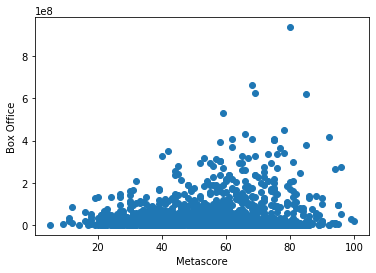

In [5]:
plt.scatter(X, y)
plt.xlabel("Metascore")
plt.ylabel("Box Office")

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [8]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X_test)

mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 7080128703282929.0
R-squared (R2 ): 0.017149122998371902


In [10]:
model.score(X_test, y_test)

0.017149122998371902

In [10]:
import locale
locale.setlocale( locale.LC_ALL, '' )
repeat = True
while repeat:
    user_input = input('Enter Metascore: ')
    try:
        print(f'Predicted Box Office: {locale.currency(model.predict(np.array([[float(user_input)]]))[0][0], grouping=True)}')
        user_input = input('Again? Y/N')
        if user_input.lower() == 'n':
            repeat = False
    except:
        print('Must enter a value!')

Must enter a value!
Predicted Box Office: $36,371,054.67


In [15]:
import pickle
pickle.dump(model, open("Resources/Data/regression_model_trained.sav", "wb"))